# Guide - pyLEnM package
Welcome to the demonstration notebook where we'll go over all of the functions in the **pyLEnM** package!
Let’s get started!


## Installing, Importing, and Understanding the package

Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package.

In [1]:
# Import our packages
import pylenm
import pandas as pd
import matplotlib.pyplot as plt

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.10.1'

The pyLEnM package has two modules as follows:
   1. **functions:** where all of the package functionality is stored.
   2. **usage:** where all of the fucntion descriptions are stored.

Let's import each of these individually from the package:

In [3]:
from pylenm import functions, usage

Let's start with the **usage** module.
The module has 2 useful functions to help you understand how to use the pyLEnM functions:
   1. **get_FunctionList():** lists the fucntions available in the package.
   2. **get_FunctionDescription():** provides a detailed description of a functions of functions.

Let's see what pyLEnM has to offer:

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map




You can run **get_FunctionDescription()** on its own to get ALL function descriptions: ...

In [5]:
usage.get_FunctionDescription()

--------------------------------------------------------------------------------------
1) simplify_data
------------------------------------------

simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the d

... or simply specify the name (as a string) of the function you would like a description for:

In [6]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

If at any point you forget what or how to use any of the pyLEnM fucntions, refer back to the usage module! 

## Using pyLEnM

Now let's get our hands dirty and start exploring the **functions** module.

First, import the dataset here. It's located in the same directory in a folder called `data`.

In [7]:
data = pd.read_csv('data/FASB_Data_thru_3Q2015.csv')
data

,ID,FACILITY,FFA_INDEX_NO,SRS_AREA,OPERABLE_UNIT,STATION_ID,STATION_TYPE,SEIR_ID,WELL_USE,REVISION_ID,SAMPLE_EVENT,LOG_BOOK_NO,SAMPLE_NAME,COLLECTION_DATE,QUARTER,SAMPLE_USE,ANALYTE_NAME,ANALYTICAL_METHOD,CAS_No,FILTERED_UNFILTERED,MDL,PQL,EPA_STORET___EMS_QUALIFIERS,EPA_FUNCT_GUIDE_CODE,LAB_QUALIFICATION,DATA_QUALIFERS,RESULT,RESULT_UNITS,COUNTING_UNCERTAINTY,MATRIX_CODE,VALIDATION_STATUS,FIELD_QC_CODE,LAB_QC_CODE,LAB_CODE,ANALYTE_TYPE,DILUTION_FACTOR,SAMPLER_COMMENTS
0,214782,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB104D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q02FHRCRA,NaN,FHR-000001046,9/5/02,2002-3Q,FA;PWI,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.08,1.0,NaN,NaN,U,U,1.00,ug/L,NaN,GRWATER,VU,REG,REG,MLFY02,TRG,1.0,NaN
1,214785,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB112A,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB112A:129991:D,1/11/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.96,5.0,NaN,U,NaN,U,5.00,ug/L,NaN,GRWATER,D,SPL,REG,WA,TRG,1.0,NaN
2,214786,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97A,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB97A:129830,1/3/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.54,1.0,NaN,U,NaN,U,1.00,ug/L,NaN,GRWATER,D,REG,REG,ML,TRG,1.0,NaN
3,214787,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 88C,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q97FSB,NaN,FSB88C:95040,1/3/97,1997-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
4,214788,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97D,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,3Q95FSB,NaN,FSB97D:67314,8/18/95,1995-3Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8240,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660750,785623,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 14D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660751,785624,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 17D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.16,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660752,785625,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB117D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.46,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660753,785626,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 15D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W


Now that we have our data imported let's save the data into our functions class.

We do this by initializing **functions** with our data. We'll call the instance pylenm

In [8]:
# Create instance
pylenm = functions(data)

Successfully stored the data!



If the data passed doesn't meet the package requiremnts, you'll be presented with the following message.

To demonstrate the requirments we'll pass an arbitrary list instead of a dataframe.

In [9]:
functions([1,2,3,4,5])

ERROR: Make sure the data is a pandas DataFrame.

PYLENM DATA REQUIREMENTS:
The imported data needs to meet ALL of the following conditions to have a successful import:
   1) Data should be a pandas dataframe.
   2) Data must have these column names (Case sensitive): 
      ['COLLECTION_DATE','STATION_ID','ANALYTE_NAME','RESULT','RESULT_UNITS']


We can view the data we imported by running the `getData()` function.

In [10]:
pylenm.getData()

,ID,FACILITY,FFA_INDEX_NO,SRS_AREA,OPERABLE_UNIT,STATION_ID,STATION_TYPE,SEIR_ID,WELL_USE,REVISION_ID,SAMPLE_EVENT,LOG_BOOK_NO,SAMPLE_NAME,COLLECTION_DATE,QUARTER,SAMPLE_USE,ANALYTE_NAME,ANALYTICAL_METHOD,CAS_No,FILTERED_UNFILTERED,MDL,PQL,EPA_STORET___EMS_QUALIFIERS,EPA_FUNCT_GUIDE_CODE,LAB_QUALIFICATION,DATA_QUALIFERS,RESULT,RESULT_UNITS,COUNTING_UNCERTAINTY,MATRIX_CODE,VALIDATION_STATUS,FIELD_QC_CODE,LAB_QC_CODE,LAB_CODE,ANALYTE_TYPE,DILUTION_FACTOR,SAMPLER_COMMENTS
0,214782,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB104D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q02FHRCRA,NaN,FHR-000001046,9/5/02,2002-3Q,FA;PWI,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.08,1.0,NaN,NaN,U,U,1.00,ug/L,NaN,GRWATER,VU,REG,REG,MLFY02,TRG,1.0,NaN
1,214785,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB112A,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB112A:129991:D,1/11/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.96,5.0,NaN,U,NaN,U,5.00,ug/L,NaN,GRWATER,D,SPL,REG,WA,TRG,1.0,NaN
2,214786,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97A,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB97A:129830,1/3/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.54,1.0,NaN,U,NaN,U,1.00,ug/L,NaN,GRWATER,D,REG,REG,ML,TRG,1.0,NaN
3,214787,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 88C,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q97FSB,NaN,FSB88C:95040,1/3/97,1997-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
4,214788,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97D,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,3Q95FSB,NaN,FSB97D:67314,8/18/95,1995-3Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8240,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660750,785623,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 14D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660751,785624,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 17D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.16,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660752,785625,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB117D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.46,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660753,785626,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 15D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W


At any point we can also reset the current working dataset by running `setData()`

In [11]:
pylenm.setData(data)

Successfully stored the data!



Let's make use of the **simplify_data** function to get rid of columns we don't need for analysis.

Just as a reminder, we'll call `usage.get_FunctionDescription('simplify_data')` to get details on how to use it.

In [12]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

We'll set the `inplace` parameter to `True` to make it the default working dataset. 

In [13]:
pylenm.simplify_data(inplace=True)

Successfully stored the data!



,COLLECTION_DATE,STATION_ID,ANALYTE_NAME,RESULT,RESULT_UNITS
0,1990-01-01,FSB 93C,SPECIFIC CONDUCTANCE,345.00,uS/cm
1,1990-01-01,FSB111D,BENZENE,1.00,ug/L
2,1990-01-01,FSB 93C,"1,2-DICHLOROPROPANE",1.00,ug/L
3,1990-01-01,FSB105C,FLUORIDE,2.50,mg/L
4,1990-01-01,FSB105C,BARIUM,559.00,ug/L
...,...,...,...,...,...
629770,2015-09-24,FOB 13D,DEPTH_TO_WATER,21.50,ft
629771,2015-09-24,FBI 14D,DEPTH_TO_WATER,17.40,ft
629772,2015-09-24,FBI 17D,DEPTH_TO_WATER,25.16,ft
629773,2015-09-24,FSB117D,DEPTH_TO_WATER,23.46,ft


Let's generate some useful reports about the data by calling `get_analyte_details` and `get_data_summary`

In [14]:
pylenm.get_analyte_details('IODINE-129')

,Start Date,End Date,Date Range (days),Unique samples,Cumulative samples
Well Name,,,,,
FSB 87B,1990-01-06,2002-02-14,4422,15,15
FSB 87A,1990-01-06,2006-01-23,5861,19,34
FSB106C,1990-01-06,2006-01-26,5864,19,53
FSB 78A,1990-01-06,2015-01-20,9145,27,80
FSB 87C,1990-01-06,2015-01-20,9145,27,107
...,...,...,...,...,...
FSB146D,2015-04-29,2015-09-09,133,9,4689
FSB145D,2015-04-30,2015-09-09,132,9,4698
FSB143D,2015-05-04,2015-09-09,128,9,4707


In [15]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'],
                        sort_by='wells')

,Start Date,End Date,Date Range (days),Unique wells,Samples,Result unit,Result mean,Result std,Result min,Result 25%,Result 50%,Result 75%,Result max
Analyte Name,,,,,,,,,,,,,
TRITIUM,1990-01-01,2015-09-23,9396 days,160,13476,pCi/mL,1248.316406,3261.565925,-0.628,25.300,193.00,934.00,44800.0
PH,1990-01-01,2015-09-23,9396 days,158,18517,pH,5.354886,1.529332,0.000,4.100,5.20,6.40,12.7
SPECIFIC CONDUCTANCE,1990-01-01,2015-09-23,9396 days,156,18276,uS/cm,425.754861,555.068915,0.000,87.000,213.00,544.00,10700.0
DEPTH_TO_WATER,1990-01-01,2015-09-24,9397 days,155,20091,ft,46.814224,38.137888,0.500,16.450,32.17,72.90,177.2
IODINE-129,1990-01-06,2015-09-23,9391 days,150,5405,pCi/L,41.624339,92.511351,-356.900,0.996,9.37,45.10,1620.0
URANIUM-238,1990-01-06,2015-09-23,9391 days,144,5319,pCi/L,66.398114,169.240747,-2.650,0.062,0.64,43.75,1810.0


### Temporal Analysis

In [16]:
usage.get_FunctionDescription('plot_data')


plot_data (well_name, analyte_name, log_transform=True,
     alpha=0, year_interval=2, plot_inline=True, save_dir='plot_data')
Description:
    Plot concentrations over time of a specified well and analyte with a smoothed curve on interpolated data points.
Parameters:
    well_name (string): name of the well to be processed
    analyte_name (string): name of the analyte to be processed
    log_transform (bool): choose whether or not the data should be transformed to log base 10 values
    alpha (int): value between 0 and 10 for line smoothing
    year_interval (int): plot by how many years to appear in the axis e.g.(1 = every year, 5 = every 5 years, ...)
    plot_inline (bool): choose whether or not to show plot inline
    save_dir (string): name of the directory you want to save the plot to



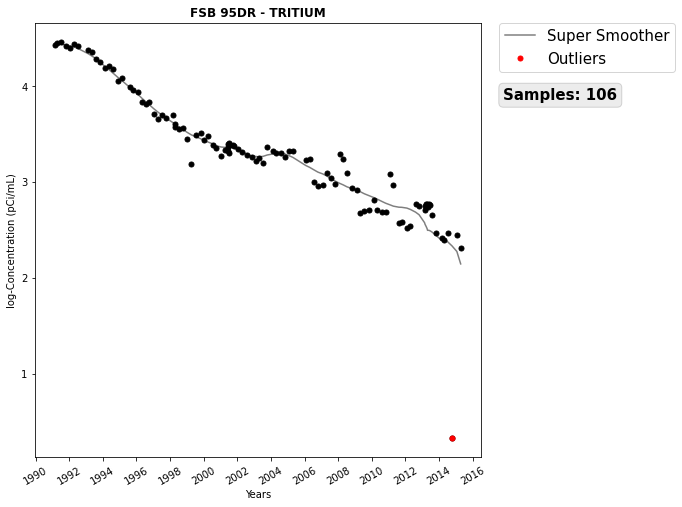

In [17]:
pylenm.plot_data(well_name= 'FSB 95DR', analyte_name='TRITIUM')

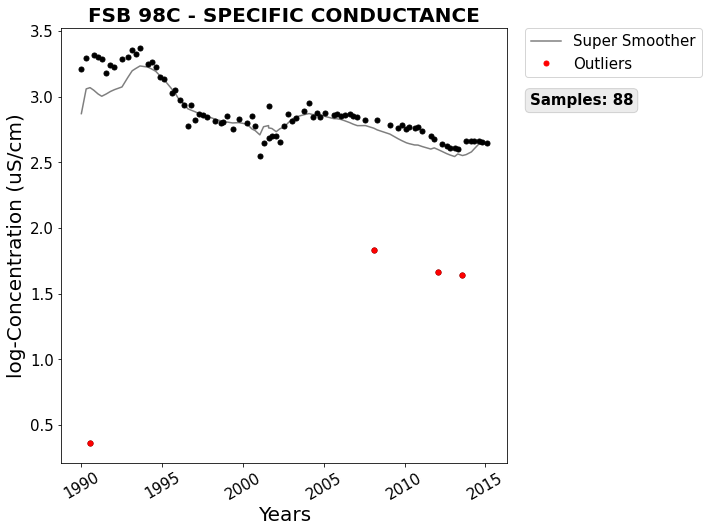

In [18]:
pylenm.plot_data(well_name= 'FSB 98C', analyte_name='SPECIFIC CONDUCTANCE', year_interval=5)

When using the interpolation functionality, a resampling frequency can be specifed. Correct inputs for the the frequency can be found in the function description. 

In [19]:
usage.get_FunctionDescription('interpolate_wells_by_analyte')


interpolate_wells_by_analyte (analyte, frequency='2W', rm_outliers=True, z_threshold=3)
Description: 
    Resamples analyte data based on the frequency specified and interpolates the values in between. 
    NaN values are replaced with the average value per well.
Parameters:
    analyte (string): analyte name for interpolation of all present wells.
    frequency (string): {‘D’, ‘W’, ‘M’, ‘Y’} frequency to interpolate. 
        See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html for valid frequency inputs. 
        (e.g. ‘W’ = every week, ‘D ’= every day, ‘2W’ = every 2 weeks)
    rm_outliers (bool): flag to remove outliers in the data
    z_threshold (int): z_score threshold to eliminate outliers




The `interpolate_wells_by_analyte` function is great as it interpolates and combines all of the wells with the same analyte. There is no need to specify a start and end date as the algorithm will find the optimum start and end date.

In [20]:
wt = pylenm.interpolate_wells_by_analyte(analyte='DEPTH_TO_WATER',
                                         frequency= '2M',
                                         rm_outliers=True,
                                         z_threshold=2.5)
wt

,FSB105C,FSB125D,FOB 14D,FOB 1D,FSB 99C,FSP249B,FSP226A,FSB122D,FSB 93D,FSB 98AR,FSB108D,FSB115C,FOB 15D,FSB129D,FPZ 3A,FSB100PD,FSB134D,FSB123C,FSB110C,FSB 87D,FSB128D,FSB101A,FPZ008AR,FIB 1,FSB131D,FSB119D,FSB105DR,FSB144D,FPZ 7B,FSB 93C,FSB124D,FSP 2B,FSB113A,FSB113C,FSB107C,FSB120A,FSB104D,FOB 2C,FPZ 4A,FSB118D,FSB 79C,FSB 76B,FSB 78C,FSB146D,FSB 89D,FSB142D,FSB 89C,FSB112C,FSB105D,FSB121DR,FSB 97A,FSB130D,FSB121C,FIB 8,FSB 79,FBI 14D,FSB 92D,FPZ 6B,FSB112A,FEX 4,FSB 94C,FSB 79B,FSB109D,FPZ008BR,FSB139D,FSB132D,FSB 91C,FSB110D,FSB 87B,FSB127D,FSP 2A,FSB113D,FSB 78B,FSP 47A,FSB 96A,FSB 92C,FSB 95DR,FSB126D,FSB 88C,FSB100A,FSB 94D,FSP249A,FSB 98D,FSB120D,FSB 97C,FSB 94DR,FSB112D,FSB103C,FSB 95CR,FOB 14C,FBI 17D,FPZ 2A,FSB 95C,FOB 13D,FBI 15D,FSB 90C,FSP-12A,FSB120AR,FSB 95D,FSB123D,FSB135D,FSB120C,FPZ 8B,FSB 98A,FSB 87BR,FSB143D,FSB114C,FSB107D,FSB115D,FSB125DR,FSB 88D,FSB 78,FSB 79A,FPZ 8A,FSB136D,FOB 2D,FSB116C,FSP-072B,FSB102C,FSB145D,FSB 87C,FSB106C,FSP-072A,FSB141D,FSP204A,FSB 78A,FSB 90D,FSB114A,FSB140D,FSB 96AR,FSB114D,FSB104C,FSB 76,FSB106D,FSB 76C,FSB 99D,FSB 76A,FSB116D,FSB111C,FSB 99A,FSB137D,FSB 77,FSB111D,FPZ 7A,FSB117D,FSB 87A,FSB 97D,FSB112DR,FSB138D,FSB133D,FSB122C,FSB 98C,FSB 91D,FSB100PC,FPZ 6A
2003-11-30,80.203289,34.878588,15.918509,22.325473,78.942504,3.507143,5.030084,18.369035,66.697168,133.527623,81.484408,23.538856,22.757998,28.698588,10.522222,49.159375,20.491359,28.959016,35.818607,75.074202,47.039266,134.484110,3.469482,24.866159,26.859564,48.154024,76.370738,27.319900,3.468182,69.259180,54.462526,6.838889,65.450671,22.276125,61.247467,132.7,20.463388,29.632875,8.144444,32.676990,24.297524,143.373443,68.754508,26.589434,65.307243,30.651703,69.476931,31.497269,78.41,51.806731,135.006170,31.861764,55.483717,22.323845,20.837793,22.479158,64.325335,3.300000,76.954189,28.808617,74.687705,60.962835,79.137705,3.522472,19.605915,19.275402,68.909303,33.342641,139.22,15.853240,6.320000,17.389493,119.345095,4.503226,128.35,67.107063,76.078607,35.666701,71.247668,135.520902,68.2,3.846429,73.210574,73.689253,79.270670,72.745738,28.85,43.126885,78.618197,23.349288,24.896710,6.446429,79.37,18.596967,13.110653,68.133697,5.163683,132.629004,68.2,26.893607,21.429545,76.248106,1.949848,131.63,139.082288,30.010729,39.968342,57.025930,17.403911,38.880935,65.767437,65.721557,61.105641,1.900192,17.586945,25.635308,13.609742,3.330000,7.264477,27.686025,79.389598,36.021494,4.016725,22.184976,5.388151,117.421639,63.576919,97.654080,22.727312,129.219138,35.748561,21.596967,77.106204,30.683540,81.197377,73.877817,139.546311,11.976400,65.073784,138.059724,8.578309,60.593129,60.952377,4.514416,29.283458,134.859807,76.390442,26.665788,10.876069,18.163217,21.896084,76.675963,65.537287,36.195000,3.655556
2004-01-31,80.428753,34.878588,15.918509,22.358211,79.823852,3.392339,5.030084,18.014199,67.641538,133.440991,82.333728,23.412261,22.757998,28.698588,9.926677,48.347714,20.491359,29.454813,35.061984,76.845647,47.039266,134.297412,3.469482,24.866159,26.859564,48.212807,77.169304,27.319900,3.493851,69.156845,54.462526,6.589127,65.367555,22.016377,62.019194,132.7,18.311644,29.632875,7.900428,33.487806,23.108323,143.279562,67.669401,26.589434,66.917969,30.651703,70.867697,30.926770,78.41,51.642589,134.745885,31.861764,55.362392,22.323845,18.371722,21.798838,65.555488,3.071613,76.690051,35.300902,75.106855,60.912609,81.038548,3.522472,19.605915,19.275402,69.815179,32.041641,139.22,15.853240,6.246348,17.396224,119.210533,4.503226,128.35,67.761089,76.554283,35.666701,72.117663,135.357984,68.2,3.691993,74.454474,73.913928,79.802567,73.345640,28.85,42.217531,78.698024,23.349288,23.440548,5.836751,79.37,18.596967,12.679105,69.336564,5.163683,132.579231,68.2,27.557612,21.429545,76.337509,1.949848,131.63,138.938705,30.010729,40.320146,58.447323,17.717118,38.880935,67.486877,65.972623,61.027961,1.900192,17.586945,25.336552,13.447208,3.400211,6.894126,27.686025,80.520637,35.650262,3.914659,22.184976,5.388151,117.233544,65.465070,97.566308,22.7

Let's look at the difference between removing the outliers and keeping them.

<AxesSubplot:>

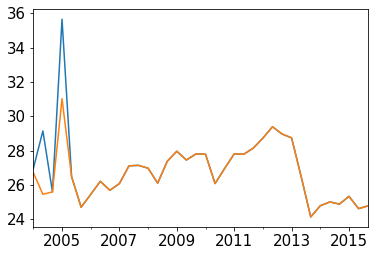

In [21]:
freq = '4M'
analyte = 'DEPTH_TO_WATER'

wt_with_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                       frequency = freq,
                                                       rm_outliers=False)

wt_without_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                          frequency = freq,
                                                          rm_outliers=True,
                                                          z_threshold=1.5)

wt_with_outliers['FSB131D'].plot()
wt_without_outliers['FSB131D'].plot()

<AxesSubplot:>

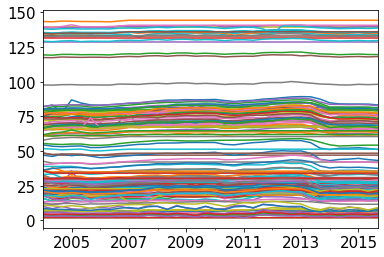

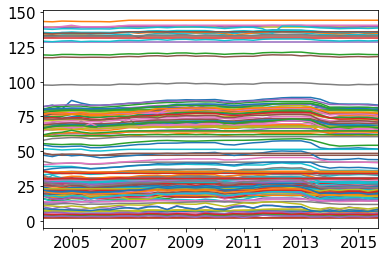

In [22]:
wt_with_outliers.plot(legend=None)
wt_without_outliers.plot(legend=None)

The `interpolate_well_data` function is useful if you are only looking at one well at a time. But has limited functionality as it can only take in **ONE** well as a parameter. 

In [23]:
pylenm.interpolate_well_data(well_name='FSB 95DR',
                             analytes=['DEPTH_TO_WATER', 'URANIUM-238'],
                             frequency='2M')

,DEPTH_TO_WATER,URANIUM-238
COLLECTION_DATE,,
1993-02-28,73.030,1620.000000
1993-04-30,72.120,1475.000000
1993-06-30,71.325,1330.000000
1993-08-31,71.940,1100.000000
1993-10-31,72.540,1155.000000
...,...,...
2014-12-31,75.375,239.666667
2015-02-28,75.610,232.000000
2015-04-30,75.000,224.333333


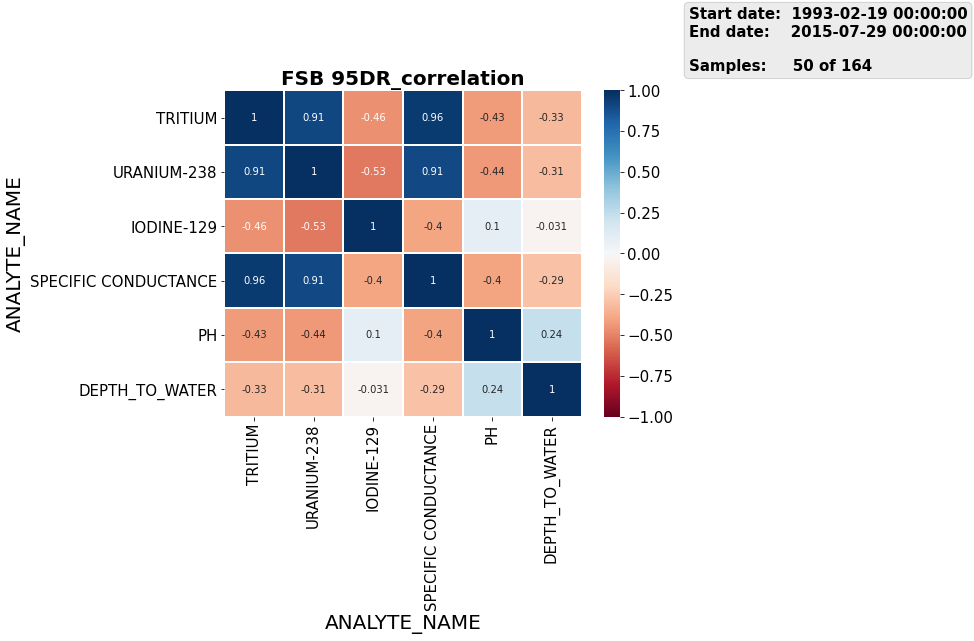

In [24]:
pylenm.plot_correlation_heatmap(well_name='FSB 95DR')

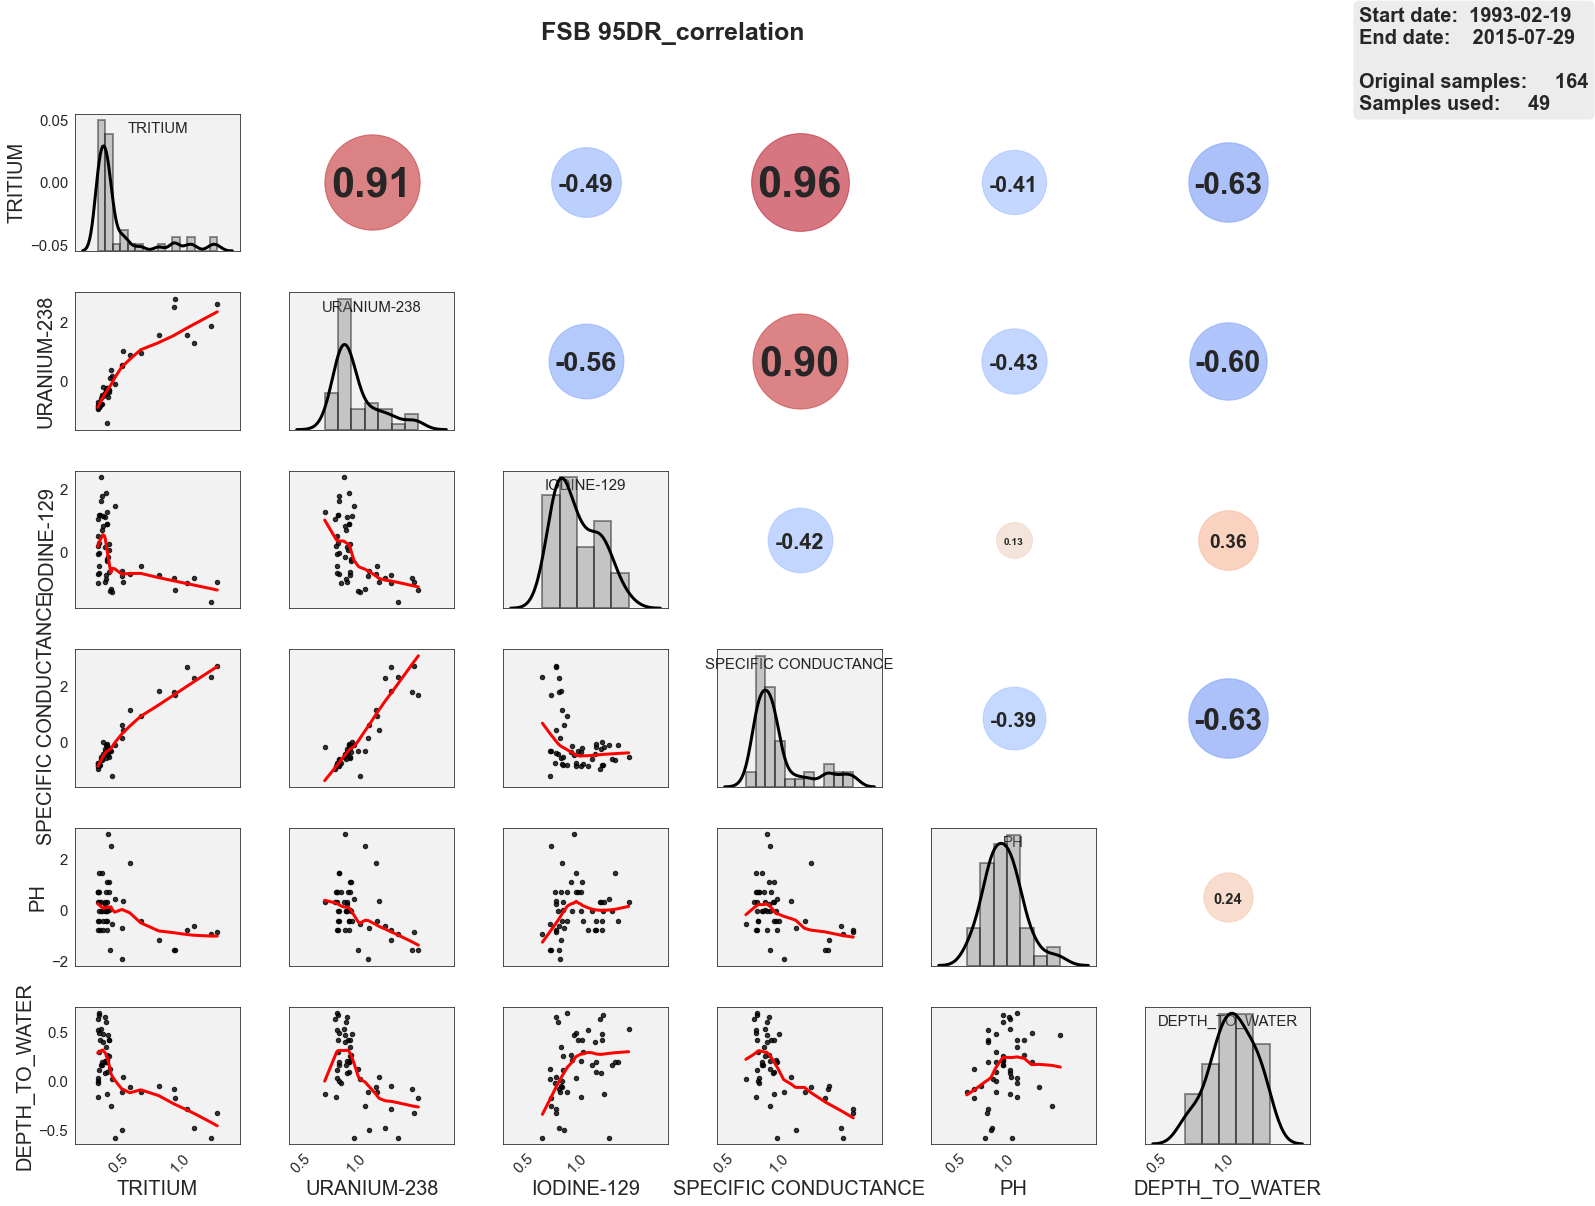

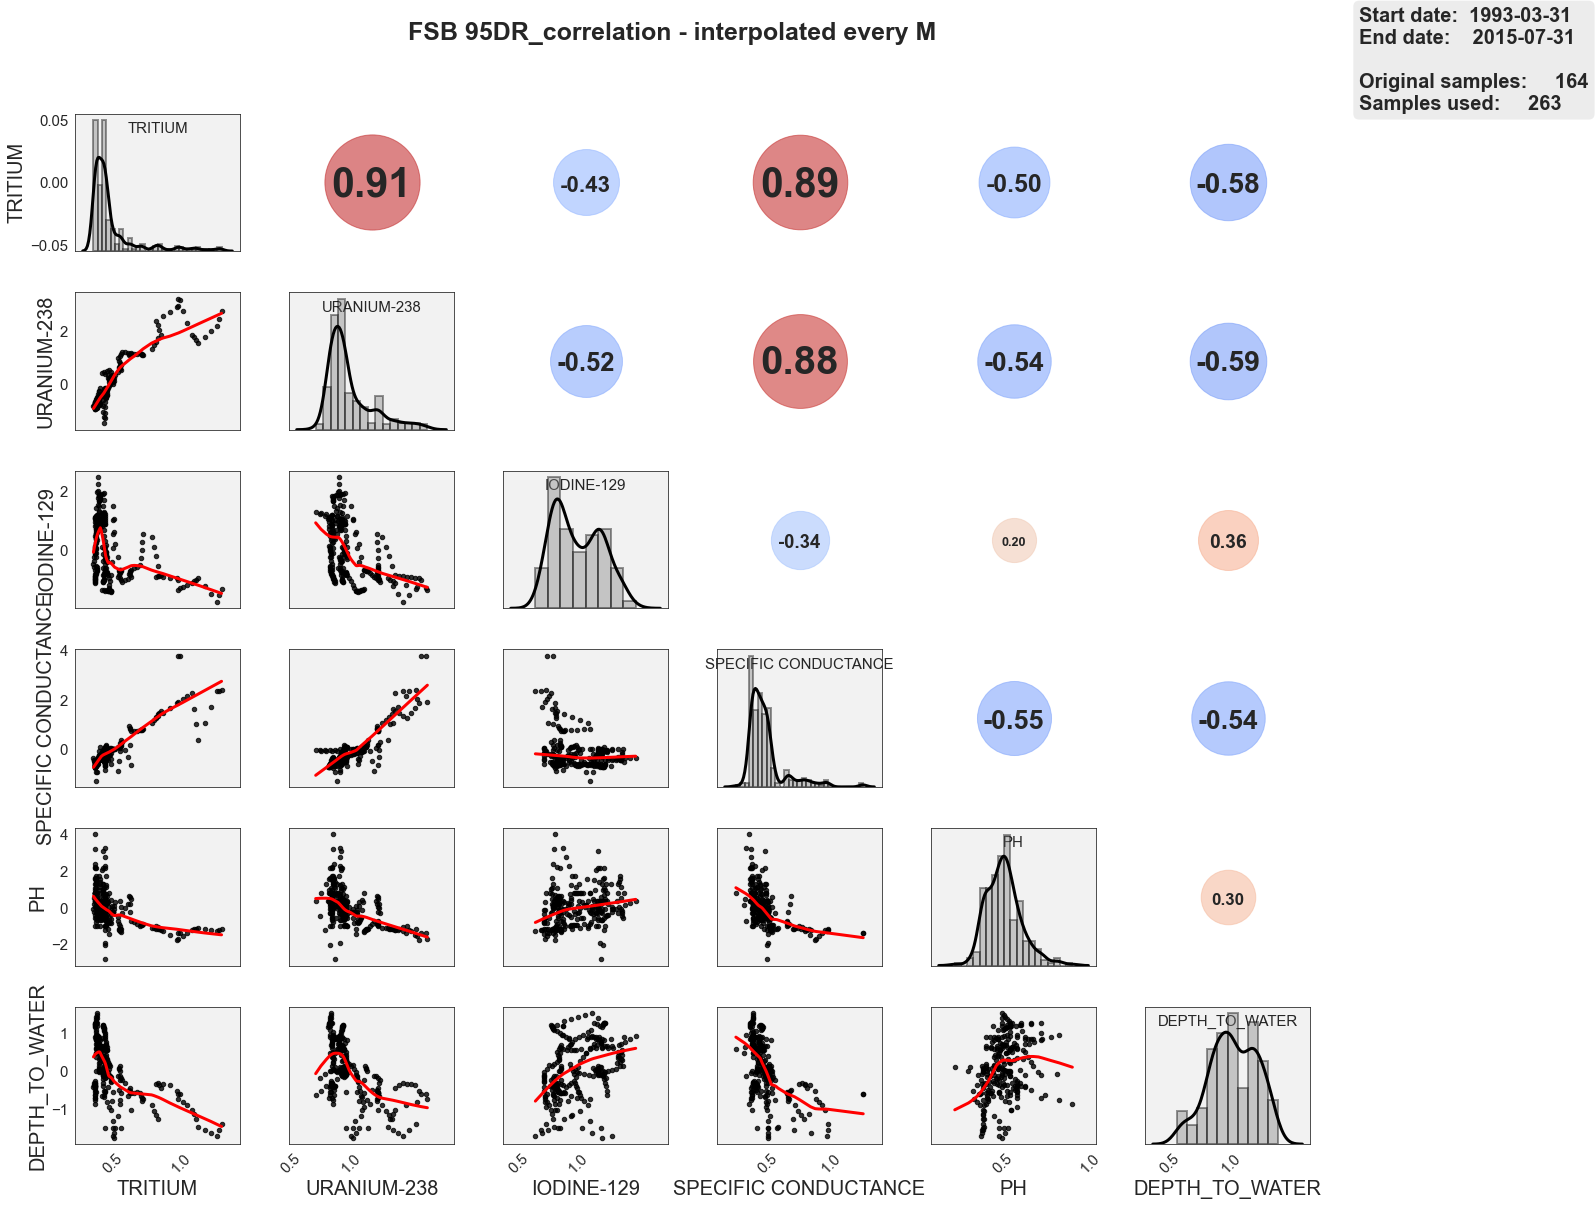

In [25]:
pylenm.plot_corr_by_well(well_name='FSB 95DR')

pylenm.plot_corr_by_well(well_name='FSB 95DR',
                         interpolate=True, frequency='M', 
                         remove_outliers=True, z_threshold=4)

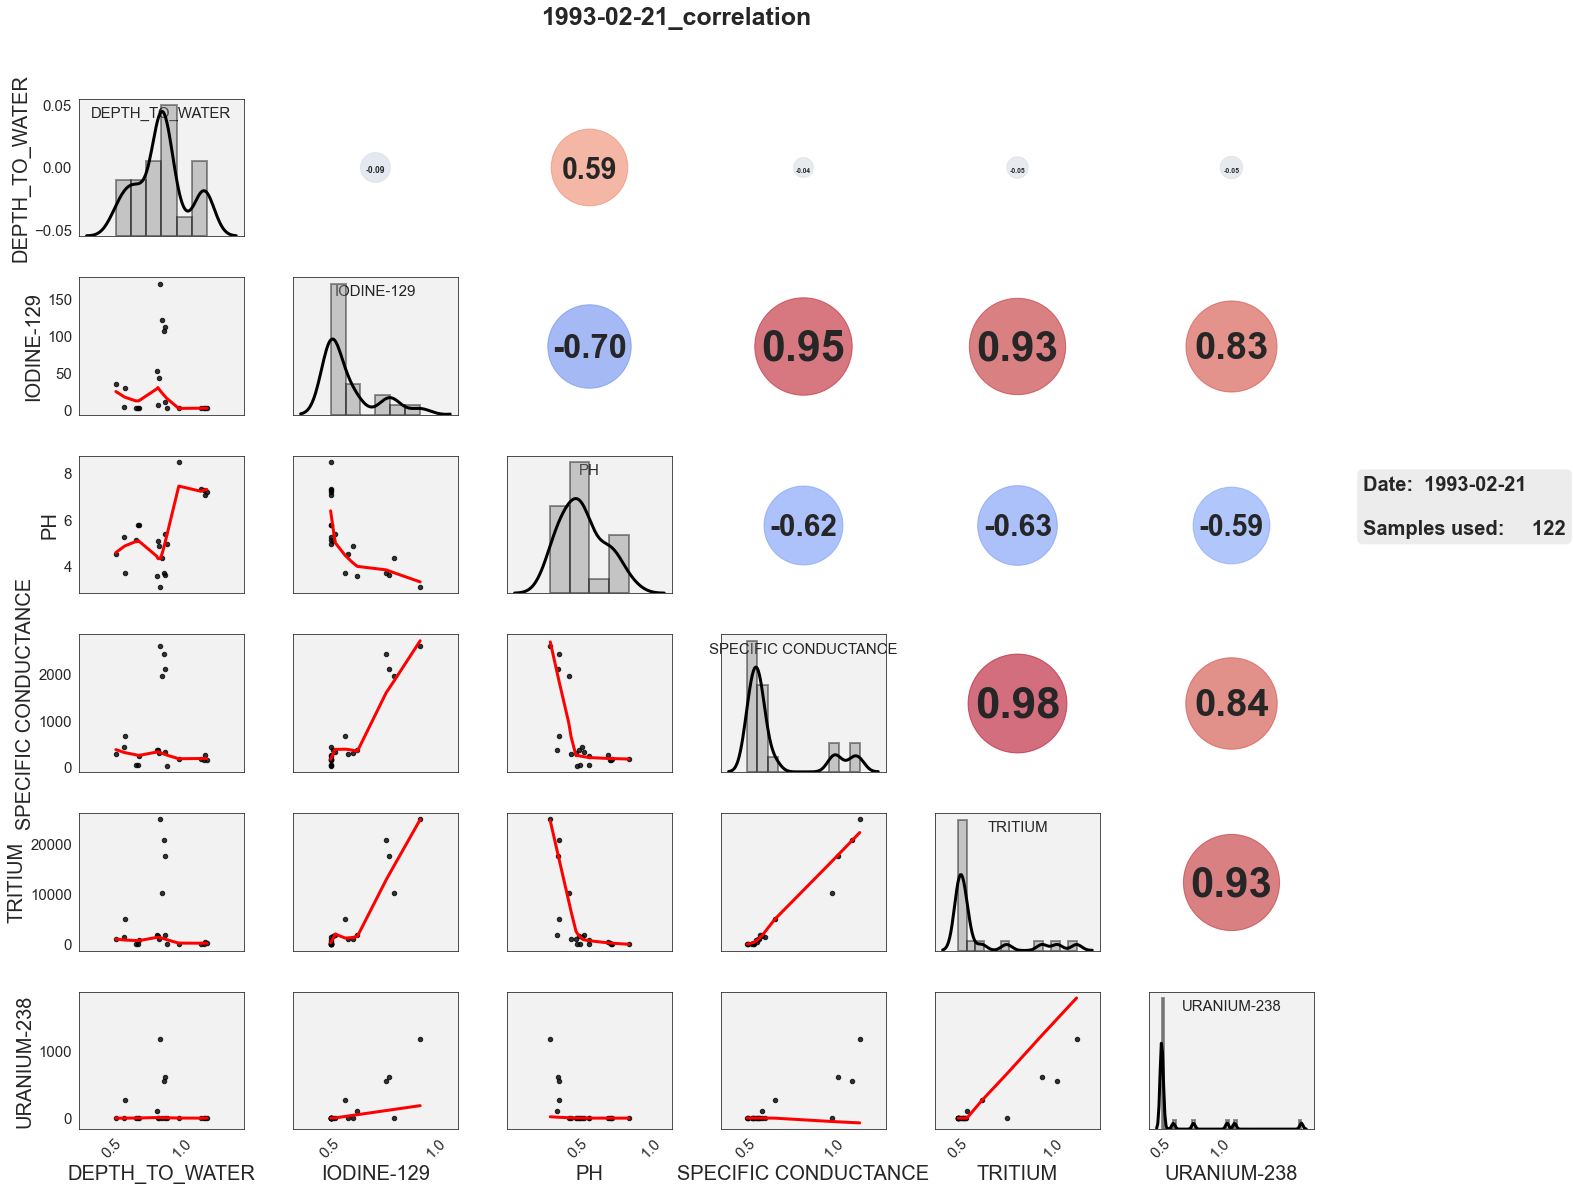

In [26]:
pylenm.plot_corr_by_date('1993-02-21')

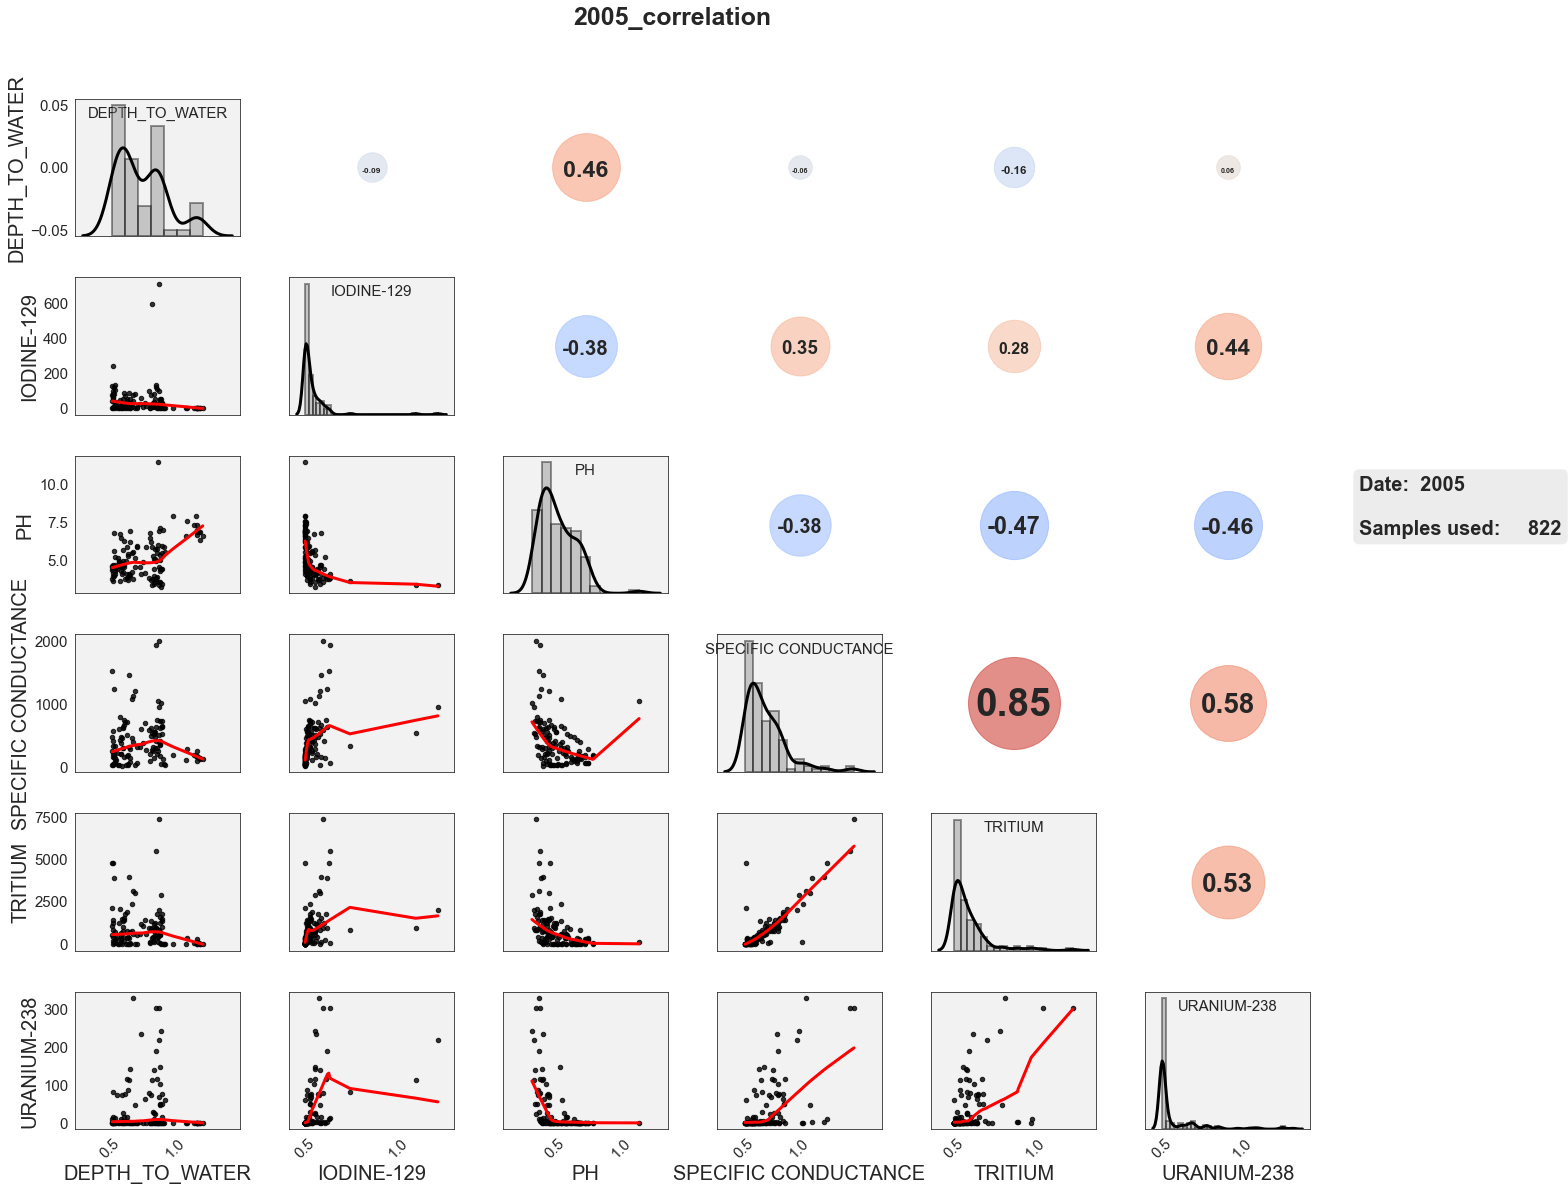

In [27]:
pylenm.plot_corr_by_year(2005, remove_outliers=True, z_threshold=3)

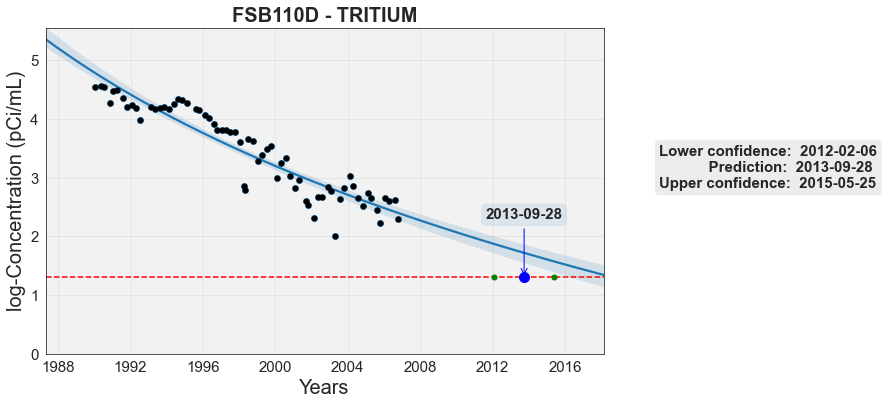

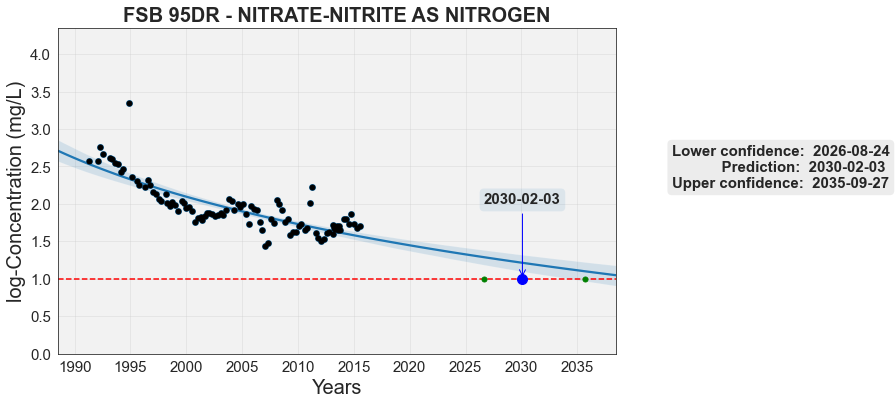

In [28]:
pylenm.plot_MCL('FSB110D', 'TRITIUM', year_interval=4)
pylenm.plot_MCL('FSB 95DR', 'NITRATE-NITRITE AS NITROGEN')

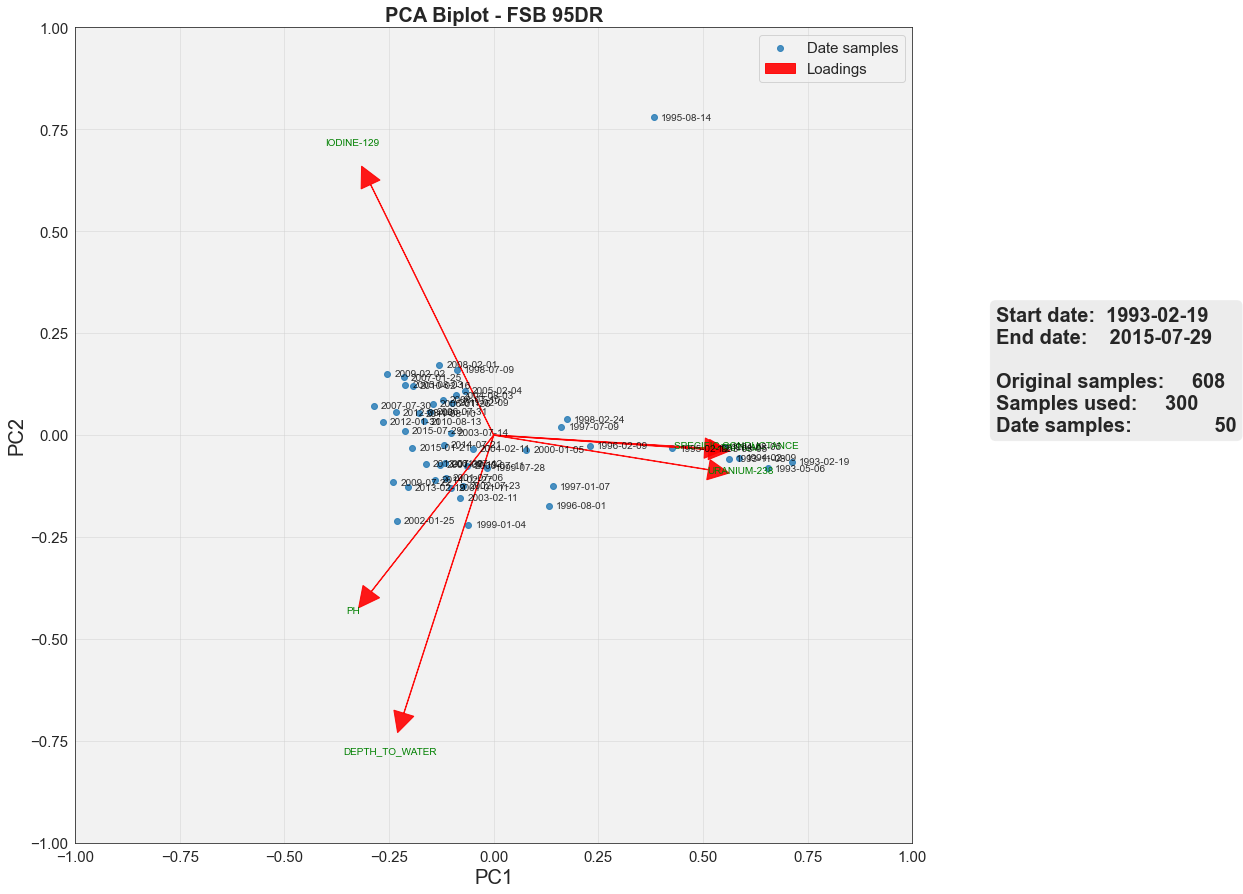

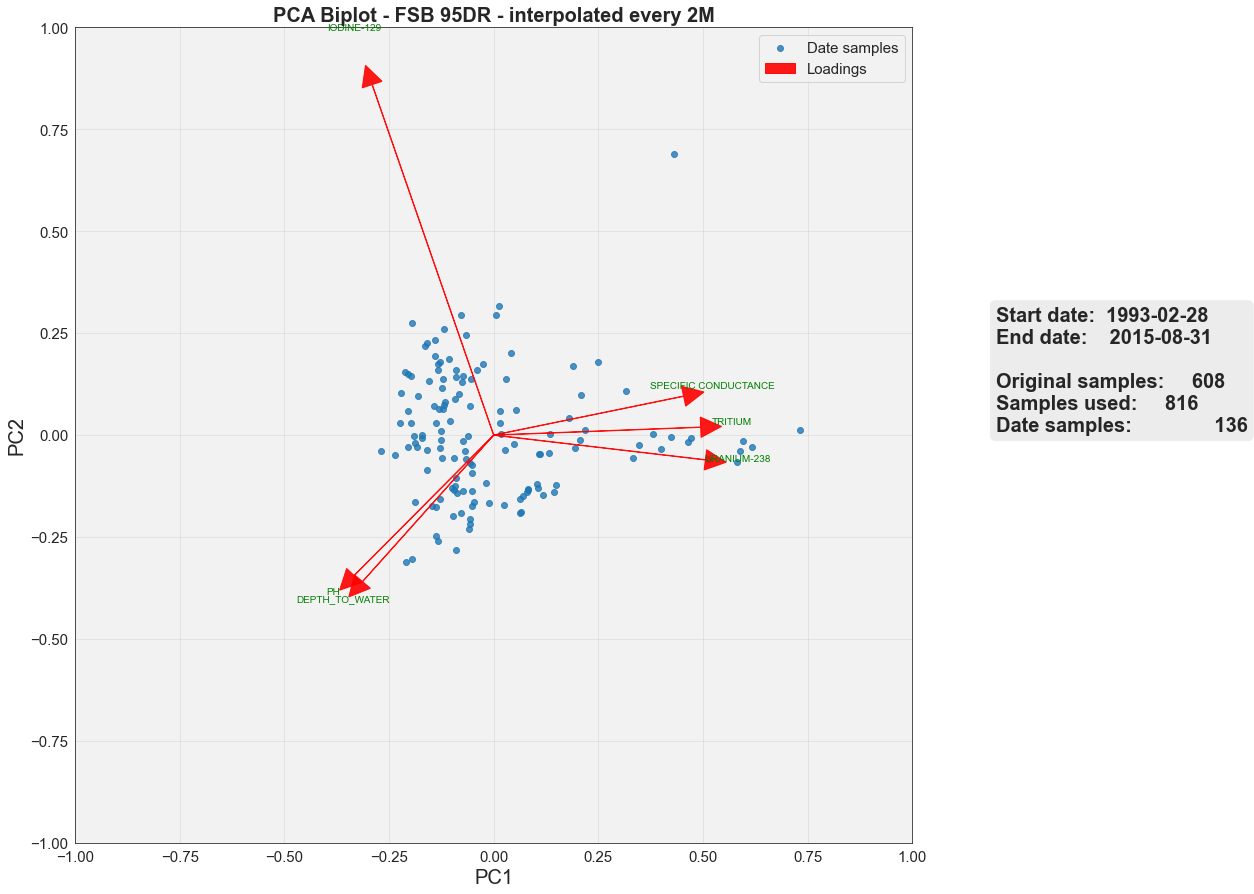

In [29]:
pylenm.plot_PCA_by_well('FSB 95DR', show_labels=True)
pylenm.plot_PCA_by_well('FSB 95DR', interpolate=True, frequency='2M', show_labels=False)

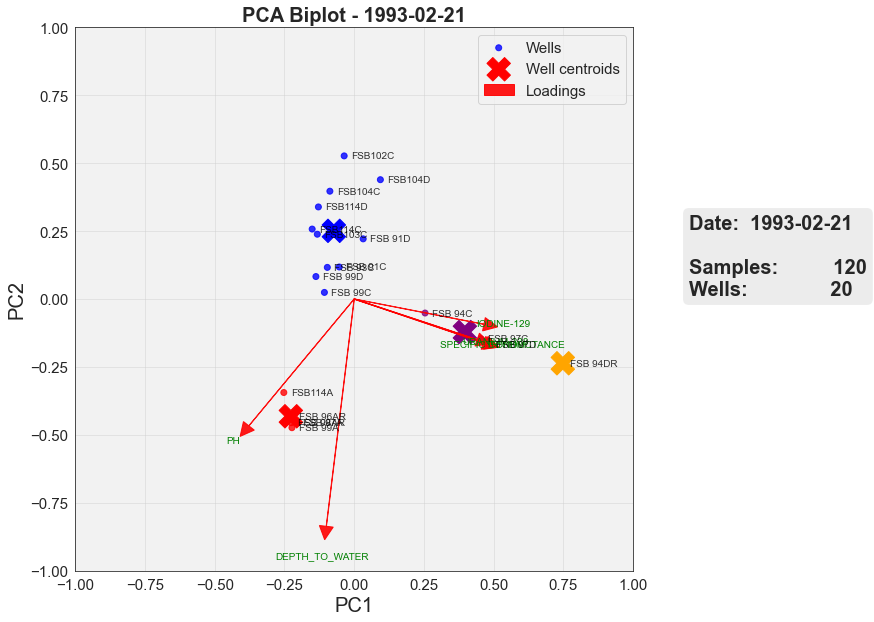

In [30]:
pylenm.plot_PCA_by_date('1993-02-21')

### Spatial Analysis

Let's go ahead and plot the PCA analysis for 2015 and visualize it using 5 clusters. We are going to want to set the parameter `return_clusters` to `True` so that we can use it to plot on a map. We'll also filter the data to only look at the 'D' wells.

One thing we need to do before is import the GPS data since `return_clusters` merges the data with the well coordinates.

In [31]:
# Import GPS data to dataframe
gps = pd.read_csv('data/F-area Well Locations Updated.csv', usecols=[0,1,2])

# Save GPS data to the package
pylenm.set_GPS_Data(gps)

Successfully stored the GPS data!



In [32]:
usage.get_FunctionDescription('plot_PCA_by_year')


plot_PCA_by_year (year, n_clusters=4, min_samples=48, filter=False,
                        filter_well_by=['D'], return_clusters=False, show_labels=True,
                        save_dir=‘plot_corr_by_year’)
Description: 
    Gernates a PCA biplot (PCA score plot + loading plot) of the data given a year in the dataset. 
    Only uses the 6 important analytes. The data is also clustered into n_clusters.
Parameters:
    year (int): date to be analyzed
    n_clusters (int): number of clusters to split the data into.
    filter (bool): Flag to indicate well filtering.
    filter_well_by (list of strings): Letter of the well to be filtered (e.g. [‘A’] or [‘A’, ‘D’])
    return_clusters (bool): Flag to return the cluster data to be used for spatial plotting.
    min_samples (int): minimum number of samples the result should contain in order to execute.
    show_labels (bool): choose whether or not to show the name of the wells.
    save_dir (string): name of the directory you want to save 

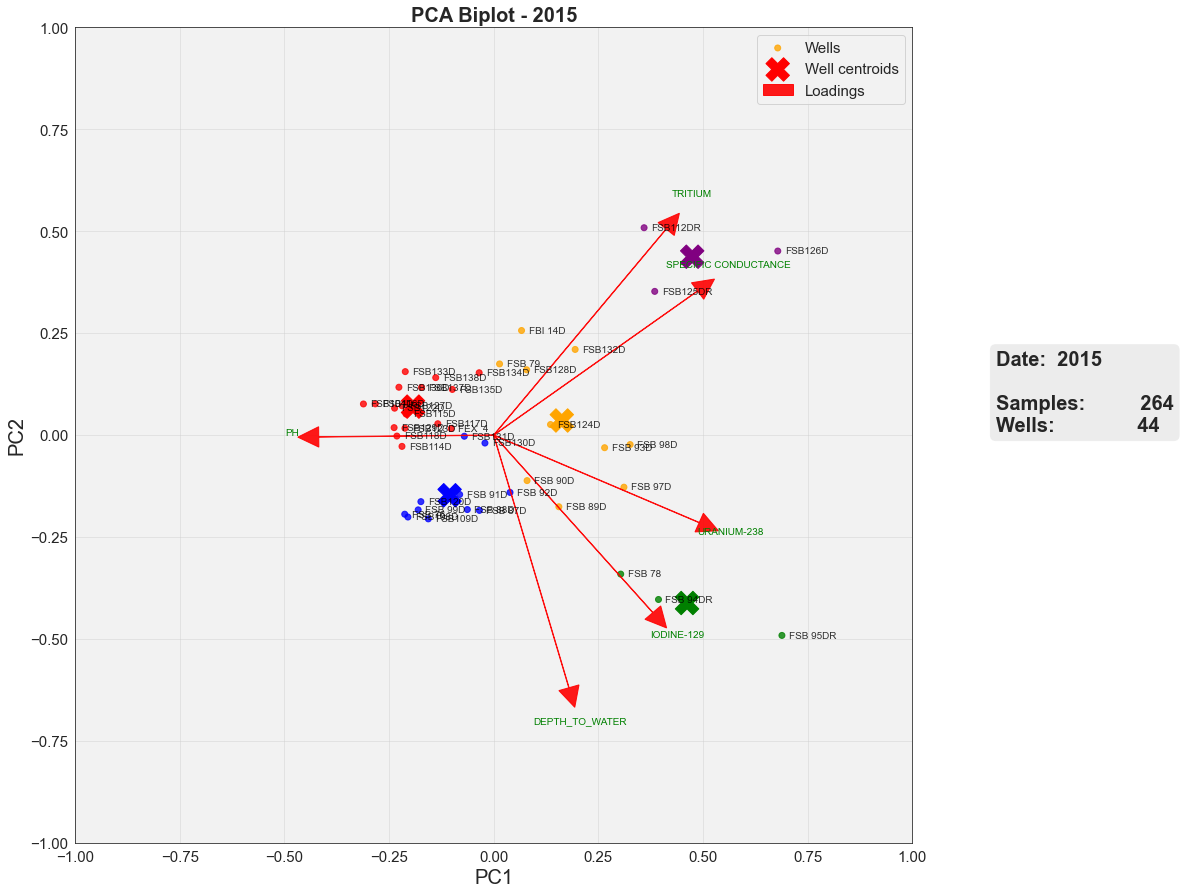

In [33]:
clusters = pylenm.plot_PCA_by_year(2015, 
                                   show_labels=True,
                                   n_clusters=5,
                                   return_clusters=True,
                                   filter=True, filter_well_by=['D']
                                  )

As you can see, the `return_clusters` flag merges the cluster color to the well's GPS coordinates.

In [34]:
clusters

,station_id,latitude,longitude,color
0,FBI 14D,33.271624,-81.677415,orange
1,FEX 4,33.270370,-81.679783,red
2,FSB 76,33.278022,-81.679385,blue
3,FSB 78,33.272978,-81.679931,green
4,FSB 79,33.270502,-81.677859,orange
5,FSB 87D,33.274660,-81.681749,blue
6,FSB 88D,33.277098,-81.678011,blue
7,FSB 89D,33.276624,-81.678372,orange
8,FSB 90D,33.275926,-81.678553,orange
9,FSB 91D,33.275235,-81.678735,blue


Now let's visualize these clusters spatially on the map by using the **plot_coordinates_to_map** function

In [35]:
usage.get_FunctionDescription('plot_coordinates_to_map')


plot_coordinates_to_map (gps_data, center=[33.271459, -81.675873], zoom=14)
Description: 
    Plots the well locations on an interactive map given coordinates.
Parameters:
    gps_data (dataframe): Data frame with the following column names: station_id, latitude, longitude, color. 
        If the color column is not passed, the default color will be blue.
    center (list with 2 floats): latitude and longitude coordinates to center the map view.
    zoom (int): value to determine the initial scale of the map



In [36]:
pylenm.plot_coordinates_to_map(clusters)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Let's also plot all of the wells that exist in the dataset for comparison.

In [37]:
pylenm.plot_coordinates_to_map(gps)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [38]:
df, dates = pylenm.transform_time_series(
                                  ['TRITIUM','URANIUM-238','IODINE-129',
                                   'SPECIFIC CONDUCTANCE', 'PH', 'DEPTH_TO_WATER'],
                                  resample='2W',
                                  rm_outliers=True
                                 )
df

,TRITIUM,URANIUM-238,IODINE-129,SPECIFIC CONDUCTANCE,PH,DEPTH_TO_WATER
FSB105C,"[1889.465341880342, 1892.7906410256408, 1896.1...","[109.95320197044335, 110.29802955665023, 110.6...","[19.834482758620688, 20.31724137931035, 20.800...","[825.2991452991453, 833.4358974358975, 841.572...","[3.389508547008547, 3.378141025641026, 3.36677...","[80.39969512195121, 80.50385714285714, 80.6198..."
FSB 99C,"[1085.0801801801802, 1075.3810810810812, 1066....","[11.995320197044334, 11.905665024630542, 11.82...","[17.6487684729064, 17.993596059113298, 18.3470...","[574.5990990990991, 574.0945945945946, 573.803...","[5.507454954954954, 5.55222972972973, 5.595800...","[79.79943181818182, 79.97065217391302, 80.1122..."
FSB104D,"[46.08550458715597, 54.01798165137614, 61.9504...","[12.17105, 12.379649999999998, 12.58825, 12.53...","[-0.43941250000000004, -0.5153625000000001, -0...","[33.094954128440364, 33.57018348623853, 34.045...","[4.482545871559633, 4.497316513761467, 4.51208...","[18.27777777777778, 17.925714285714285, 17.765..."
FSB124D,"[702.3990163994906, 702.3990163994906, 702.399...","[36.020307511493804, 36.020307511493804, 36.02...","[25.372243213832295, 25.372243213832295, 25.37...","[507.18474136238143, 507.18474136238143, 507.1...","[3.994055608820709, 3.994055608820709, 3.99405...","[54.46447050865801, 54.46447050865801, 54.4644..."
FSB 87D,"[765.0503773584906, 749.5130188679244, 746.886...","[42.571954674220954, 42.30226628895184, 42.161...","[24.203824362606234, 23.858781869688386, 23.72...","[454.28537735849056, 448.40801886792457, 447.4...","[4.392240566037737, 4.416674528301887, 4.43012...","[76.8682584269663, 77.17647058823529, 77.30337..."
...,...,...,...,...,...,...
FSB 87C,"[1367.3517452830188, 1359.436462264151, 1356.5...","[0.25125779036827195, 0.2591104815864023, 0.26...","[2.9476062322946177, 2.9146883852691228, 3.002...","[657.6603773584905, 655.2830188679246, 655.367...","[5.365, 5.365, 5.364514991181658, 5.3628395061...","[80.59410112359554, 80.7308823529412, 80.68161..."
FSB140D,"[12.266021394632022, 12.266021394632022, 12.26...","[0.12766973136636522, 0.12766973136636522, 0.1...","[-0.0578415858680637, -0.0578415858680637, -0....","[48.26737206552226, 48.26737206552226, 48.2673...","[4.770703890437626, 4.770703890437626, 4.77070...","[22.73548024714473, 22.73548024714473, 22.7354..."
FSB133D,"[389.8225653825072, 389.8225653825072, 389.822...","[4.164009008048537, 4.164009008048537, 4.16400...","[15.627403054794694, 15.627403054794694, 15.62...","[429.5200004169349, 429.5200004169349, 429.520...","[7.0893283229963995, 7.0893283229963995, 7.089...","[18.165925471718207, 18.165925471718207, 18.16..."
FSB 90D,"[505.3272596153846, 457.07168269230766, 434.78...","[173.07070707070707, 177.03030303030303, 179.6...","[68.12499999999999, 70.225, 72.73405743740796,...","[377.5625, 375.8125, 379.02178178963896, 394.4...","[3.5654807692307693, 3.616634615384615, 3.6564...","[65.49568965517241, 65.8264705882353, 65.95337..."


In [39]:
iodine = pylenm.get_individual_analyte_df(df, dates, 'IODINE-129')
iodine

,FSB105C,FSB 99C,FSB104D,FSB124D,FSB 87D,FSB108D,FSB110C,FOB 14D,FOB 1D,FSP249B,FSB104C,FSP226A,FSB122D,FSB 93D,FSB 98AR,FSB115C,FSB129D,FPZ 3A,FSB120A,FSB107C,FSB113C,FSB113A,FSB106D,FSB 76C,FSP-072B,FSB 95DR,FSB126D,FSB 92C,FPZ008AR,FSB131D,FSB125DR,FSB119D,FSB105DR,FPZ 7B,FSB101A,FSB 93C,FSP 2B,FSB137D,FSB134D,FSB123C,FSB 78B,FSB 87B,FPZ 6B,FSB121DR,FSB 92D,FSB 78C,FSB 89D,FSB 89C,FSB112C,FSB 76B,FMC-002H,FSB 97A,FM-A7U,FSB121C,FSB 79,FBI 14D,FSP 47A,FEX 4,FPZ 4A,FSB113D,FSB128D,FSB118D,FSB112A,FSB 94C,FSB 79B,FSB109D,FPZ008BR,FSB139D,FSB132D,FSB 91C,FM-2BD,FSB110D,FMC-002F,FSB127D,FSP 2A,FSB 76,FSB 79C,FSB114D,FSB 98D,FSB 99A,FSB116D,FSB116C,FSB120AR,FBI 15D,FSB 96AR,FSB 78A,FBI 17D,FSB 95CR,FSB112D,FSB 88C,FSB 94DR,FSB 97C,FSB120D,FSP249A,FSB 77,FSB100A,FSB 90C,FSB103C,FSB107D,FSB136D,FSB 79A,FSB 78,FSB 88D,FSB123D,FSB115D,FSB114C,FSB 87BR,FSB120C,FSB135D,FSP-12A,FPZ 6A,FSB111D,FSB106C,FSP-072A,FSB141D,FPZ 2A,FSP204A,FSB 99D,FSB114A,FSB 76A,FSB112DR,FSB102C,FSB 91D,FSB130D,FSB 98C,FSB 97D,FSB138D,FPZ 7A,FSB117D,FSB 87A,FSB111C,FSB 87C,FSB140D,FSB133D,FSB 90D,FSB122C
2004-01-04,19.834483,17.648768,-0.439413,25.372243,24.203824,-0.515758,16.130699,71.437189,37.008914,2.248424,4.117514,5.660975,-0.598229,40.079545,0.373659,-0.279756,0.3376,4.078638,6.42,2.769390,-0.855640,-1.101444,0.139989,0.129000,0.090750,391.620283,67.988343,10.950244,39.733674,25.430110,46.535829,69.700870,47.308974,20.619464,-0.544623,7.830123,-0.053749,1.827955,22.137819,-0.430157,1.070073,0.3504,25.228678,-0.121255,37.931818,112.392857,96.672059,0.502388,84.626617,0.219887,0.622316,0.703240,2.470351,3.363333,50.883947,98.169553,38.73134,32.398069,24.243103,0.835503,18.463342,2.083333,0.334910,124.188940,-0.736403,5.687927,10.939005,1.455422,23.901541,16.060152,0.379042,34.734483,2.269346,2.220738,0.256490,-0.400951,33.333947,-0.710278,26.147727,-0.118963,-0.861365,-0.172491,-0.567074,81.356469,0.168417,-1.014307,84.597024,41.557583,4.89,7.220227,84.688579,20.238756,1.923596,13.838587,35.840671,-0.091025,1.359444,1.245314,121.847826,21.149541,-0.087768,478.711538,43.046701,-0.145147,-0.604101,-0.410537,-0.050048,6.713202,25.009140,9.221489,112.669710,13.725000,39.193443,0.304902,0.146662,0.407575,38.471399,23.981618,-0.816014,-0.223134,43.363623,12.462500,22.606881,69.012354,19.937861,41.190431,8.042609,268.447671,66.057357,0.276074,5.086934,2.947606,-0.057842,15.627403,68.125000,12.074162
2004-01-18,20.317241,17.993596,-0.515363,25.372243,23.858782,-0.509128,15.857904,71.437189,37.008914,2.137337,4.091952,5.660975,-0.664036,39.421970,0.120033,-0.287844,0.3376,4.078638,6.42,2.694951,-0.897214,-1.158424,0.138289,0.146980,0.083750,384.818396,67.988343,10.895610,39.733674,25.430110,46.535829,69.627826,47.488462,21.410156,-0.583457,7.935640,-0.096501,1.827955,22.137819,-0.433373,1.116828,0.3504,22.865758,-0.130980,38.228788,112.592857,96.814746,0.560114,83.003731,0.239380,0.643526,0.701294,2.477162,3.456667,50.950263,97.864525,38.73134,31.447801,24.243103,0.854728,18.463342,1.896667,0.313124,125.737327,-0.733683,5.143634,10.939005,1.455422,23.901541,16.166751,0.383377,35.217241,2.350981,2.220738,0.358130,-0.411742,32.000263,-0.719134,24.882071,-0.160757,-0.892141,-0.196131,-0.654779,81.269677,0.128521,-1.025314,83.380357,41.152844,4.89,6.882955,74.320051,20.560287,1.795320,13.275543,35.956518,-0.081833,1.281667,1.030952,121.239130,21.149541,-0.091463,492.173077,42.677157,-0.162912,-0.622246,-0.405729,-0.070592,6.637340,25.009140,9.221489,114.560606,13.491667,39.285246,0.315882,0.146662,0.330198,38.471399,24.345343,-0.844403,-0.208353,43.363623,12.345833,20.770183,69.012354,20.203726,41.940670,8.042609,262.333333,66.000136,0.266317,5.076878,2.914688,-0.057842,15.627403,70.225000,12.156285
2004-02-01,20.800000,18.347021,-0.591313,25.372243,23.724925,-0.502499,15.585110,71.437189,37.008914,2.026250,4.077731,5.660975,-0.729843,38.808154,-0.124262,-0.295933,0.3376,4.078638,6.42,2.620512,-0.938789,-1.215405,0.136588,0.145679,0.076750,378.016509,67.988343,10.840

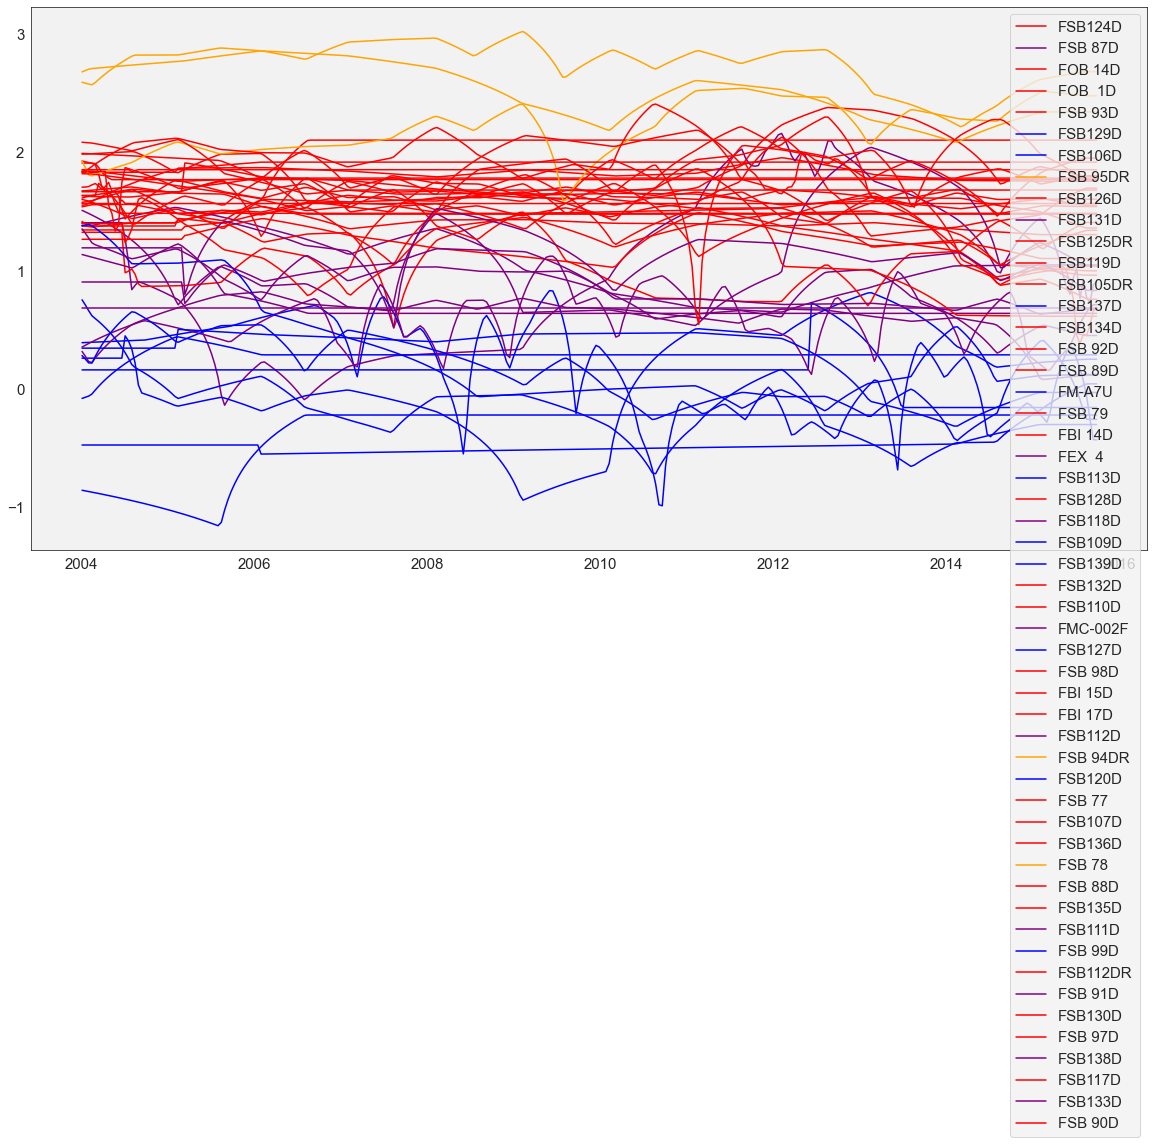

In [40]:
clusters_iodine = pylenm.cluster_data(iodine, log_transform=True, filter=True, return_clusters=True)

In [41]:
pylenm.plot_coordinates_to_map(clusters_iodine)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…